# Tensorflow
 - 가장 널리 쓰이는 딥러닝 프레임워크 중의 하나
 - 구글이 주도적으로 개발하는 플랫폼
 - 파이썬, C++API를 기본으로 제공
   - JavaScript, Java, Go, Swift 등 다양한 프로그래밍 언어를 지원
 - tf.keras를 중심으로 고수준 API 통합(2.x버전)
 - TPU(Tensor Progressing Unit)지원
   - TPU는 GPU보다 전력을 적게 소모, 경제적
   - 일반적으로 32비트(float32)로 수해되는 곱셈연산을 16비트로 낮춤  

# 텐서플로우 아키텍처

- Tensorflow Estimator
- tf.layers, tf.losses, tf.metrics
- Python Tensorflow
- C++ Tensorflow
- CPU
  - https://developers.google.com/machine-learning/crash-course/first-steps-with-tensorflow/toolkit

# 텐서플로우 시작하기

In [1]:
import numpy as np
import tensorflow as tf

In [4]:
print(tf.__version__)

2.9.1


# 텐서(Tensor)의 객체
  - 타입(Type) : string, float32, float16, int32, int8 등
  - 형상(Shape) : 0, 1, 2차원 등의 데이터 차원
  - 축(Rank) : 차원의 개수

# 텐서의 차원과 연산

In [5]:
a = tf.constant(2)
print(tf.rank(a))  # rank 차원
print(a)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)


In [6]:
b = tf. constant([2,3])
print(tf.rank(b))
print(b)

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor([2 3], shape=(2,), dtype=int32)


In [7]:
c = tf.constant([[2,3],[6,7]])
print(tf.rank(c))
print(c)

tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(
[[2 3]
 [6 7]], shape=(2, 2), dtype=int32)


In [8]:
d = tf.constant(['Hello'])
print(tf.rank(d))
print(d)

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor([b'Hello'], shape=(1,), dtype=string)


### 난수생성

In [9]:
rand = tf. random.uniform([1], 0, 1)
print(rand.shape)
print(rand)

(1,)
tf.Tensor([0.75917494], shape=(1,), dtype=float32)


In [10]:
rand2 = tf.random.normal([1,2], 0, 1)
print(rand2.shape)
print(rand2)

(1, 2)
tf.Tensor([[-1.9817165  0.5106471]], shape=(1, 2), dtype=float32)


In [11]:
rand3 = tf.random.normal(shape=(3,2), mean=0, stddev=1)
print(rand3.shape)
print(rand3)

(3, 2)
tf.Tensor(
[[-1.327942   -1.6619549 ]
 [-0.8119339   1.3867704 ]
 [-1.3572139   0.11489814]], shape=(3, 2), dtype=float32)


## 즉시 실행모드(Eager Mode) 지원
 - 즉시 실행모드를 통해 텐서플로우를 파이썬처럼 사용할 수 있음
 - 1.x 버전에서는 '그래프'를 생성하고, 초기화한 뒤에 세션을 통해 값을 흐르게 하는 작업을 진행해야 함

In [12]:
a = tf.constant(3)
b = tf.constant(2)

In [13]:
print(tf.add(a,b))
print(a + b)

tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)


In [14]:
print(tf.subtract(a, b))
print(a - b)

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)


In [15]:
print(tf.multiply(a, b))
print( a * b)

tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)


### 텐서플로우 : 넘파이 
- numpy()
- tf.convet_to_tensor()

In [16]:
c = tf.add(a, b).numpy()
print(type(c))

<class 'numpy.int32'>


In [17]:
c_square = np.square(c, dtype=np.float32)
c_tensor = tf.convert_to_tensor(c_square)

print(c_square)
print(c_tensor)

25.0
tf.Tensor(25.0, shape=(), dtype=float32)


### 넘파이 사용하기

In [18]:
t = tf.constant([[1,2,3], [4,5,6]])

print(t.shape)
print(t.dtype)

(2, 3)
<dtype: 'int32'>


In [19]:
print(t[:, 1:])   # 슬라이싱

tf.Tensor(
[[2 3]
 [5 6]], shape=(2, 2), dtype=int32)


In [20]:
t[..., 1, tf.newaxis]

<tf.Tensor: shape=(2, 1), dtype=int32, numpy=
array([[2],
       [5]])>

In [21]:
t + 10

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[11, 12, 13],
       [14, 15, 16]])>

In [22]:
tf.square(t)

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[ 1,  4,  9],
       [16, 25, 36]])>

In [23]:
t @ tf.transpose(t)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[14, 32],
       [32, 77]])>

## 타입변환
 - 텐서의 기본dtype
   - float형 텐서 : float32
   - int형 텐서 : int32
 - 연산시 텐서의 타입을 맞워야 함
   - float32 ~ float32
   - int32 ~ int32
   - float32 ~ int32(x)

   - 타입변환에는 tf.cast() 사용

In [24]:
a = tf.constant(2)
print(a)

b = tf.constant(2.)
print(b)

tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(2.0, shape=(), dtype=float32)


In [25]:
# dtype이 다른 두 변수의 합은 에러 : dtype를 맞춰줘야 에러가 나지 않음
#tf.constant(2.) + tf.constant(40)

In [26]:
# dtype이 같다고 하다라도 bit type이 다르면 마찬가지로 에러가 남
#tf.constant(2.) + tf.constant(30., dtype=tf.float64)

In [27]:
t = tf.constant(30., dtype=tf.float64)
t2 = tf.constant(4.)

#print(t2 + t)
print(t2 + tf.cast(t, tf.float32))

tf.Tensor(34.0, shape=(), dtype=float32)


## AutoGraph(오토그래프)
 - Tensorflow가 작업을 좀 더 빠르게 동작하기 위한 방법으로 Graph로 만들어 연산을 진행
 - tf.Graph
 - 유연성이 있음
   - 모바일 애플리케이션, 임베디드 기기, 백엔드 서버와 같이 Python 인터프리터가 없는 환경에서 Tensorflow사용 가능

In [28]:
import timeit

## @tf.function
 - 자동으로 그래프를 생성(Auto Graph)
 - 그래프로 변환하여 사용 : GPU 연산가능
 - 파이썬으로 구성된 함수를 텐서플로우의 그래프 형태로 다루고 싶을 때 사용가능
 - 원본 함수가 필요하다면 (tf.function).python_function()

In [29]:
@tf.function
def my_function(x):
    return x**2 - 10*x + 3

print(my_function(2))
print(my_function(tf.constant(2)))

tf.Tensor(-13, shape=(), dtype=int32)
tf.Tensor(-13, shape=(), dtype=int32)


In [30]:
def my_function_(x):
    return x**2 - 10*x + 3

print(my_function_(2))
print(my_function_(tf.constant(2)))

-13
tf.Tensor(-13, shape=(), dtype=int32)


In [31]:
tf_my_func = tf.function(my_function_)

print(tf_my_func)
print(tf_my_func(2))

tf.Tensor(-13, shape=(), dtype=int32)


In [32]:
tf_my_func.python_function(2)

-13

In [33]:
def function_to_get_faster(x, y, b):
    x = tf.matmul(x, y)
    x = x + b
    return x

a_function_that_a_graph = tf.function(function_to_get_faster)

x1 = tf.constant([[1.0, 2.0]])
y1 = tf.constant([[2.0], [3.0]])
b1 = tf.constant(4.0)

a_function_that_a_graph(x1, y1, b1).numpy()

array([[12.]], dtype=float32)

In [34]:
def inner_function(x, y, b):
    x = tf.matmul(x, y)
    x = x + b
    return x

@tf.function
def outer_function(x):
    y = tf.constant([[2.0], [3.0]])
    b = tf.constant(4.0)
    return inner_function(x, y, b)

outer_function(tf.constant([[1.0, 2.0]])).numpy()

array([[12.]], dtype=float32)

In [35]:
print(tf.autograph.to_code(my_function.python_function))
print(tf.autograph.to_code(tf_my_func.python_function))
print(tf.autograph.to_code(outer_function.python_function))

def tf__my_function(x):
    with ag__.FunctionScope('my_function', 'fscope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as fscope:
        do_return = False
        retval_ = ag__.UndefinedReturnValue()
        try:
            do_return = True
            retval_ = (((ag__.ld(x) ** 2) - (10 * ag__.ld(x))) + 3)
        except:
            do_return = False
            raise
        return fscope.ret(retval_, do_return)

def tf__my_function_(x):
    with ag__.FunctionScope('my_function_', 'fscope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as fscope:
        do_return = False
        retval_ = ag__.UndefinedReturnValue()
        try:
            do_return = True
            retval_ = (((ag__.ld(x) ** 2) - (10 * ag__.ld(x))) + 3)
        except:
            do_return = False
            raise
        return fscope.ret(retval_, do_return)

def 

### 속도향상

In [36]:
class SequentialModel(tf.keras.Model):
    def __init__(self, **kwargs):
        super(SequentialModel, self).__init__(**kwargs)
        self.flatten =tf.keras.layers.Flatten(input_shape=(28,28))
        self.dense_1 = tf.keras.layers.Dense(128, activation='relu')
        self.dropout = tf.keras.layers.Dropout(0.2)
        self.dense_2 = tf.keras.layers.Dense(10)
        
    def call(self, x):
        x = self.flatten(x)
        x = self.dense_1(x)
        x = self.dropout(x)
        x = self.dense_2(x)
        return x

input_data = tf.random.uniform([60, 28, 28])

eager_model = SequentialModel()
graph_model = tf.function(eager_model) 
    
print("Eager time", timeit.timeit(lambda: eager_model(input_data), number=10000))
print("Graph time", timeit.timeit(lambda: graph_model(input_data), number=10000))

Eager time 13.499507999999992
Graph time 7.188730000000078


### 변수생성
- tf.Variable
- 딥러닝 모델 학습 시, 그래프 연산이 필요할 때 사요

In [37]:
X = tf.Variable(20.0)

print(X)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=20.0>


### Autograd(자동미분)
- tf.GradientTape API를 사용
- tf.Vatiable 같은 일부 입력에 대한 기울기 계산
  - 기본적으로 한번만 사용됨
- 변수가 포함된 연산만 기록

In [38]:
x = tf.Variable(3.0)

with tf.GradientTape() as tape:
    y = x**2


In [39]:
dy_dx = tape.gradient(y, x)
dy_dx.numpy()

6.0

In [40]:
# 한번만 사용되기 때문에 에러가 발생 
#x2 = tf.Variable(4)
#dy_dx = tape.gradient(y, x2)
#dy_dx.numpy()

In [41]:
x = tf.Variable(2.0)
y = tf.Variable(3.0)

with tf.GradientTape() as tape:
    y_sq = y**2
    z = x**2 + tf.stop_gradient(y_sq)
    
grad = tape.gradient(z, {'x':x, 'y':y})

print('dz/dx', grad['x'])
print('dz/dy', grad['y'])

dz/dx tf.Tensor(4.0, shape=(), dtype=float32)
dz/dy None


In [42]:
weights = tf.Variable(tf.random.normal((3,2)), name='weights')
biases = tf.Variable(tf.zeros(2, dtype=tf.float32), name='biases')
x = [[1., 2., 3.]]

with tf.GradientTape(persistent=True) as tape:
    y = x @ weights + biases
    loss = tf.reduce_mean(y**2)

In [43]:
[dl_dw, dl_db] = tape.gradient(loss, [weights, biases])

In [44]:
print(weights.shape)
print(dl_dw.shape)

(3, 2)
(3, 2)


In [46]:
weights2 = tf.Variable(tf.random.normal((3, 2)), name='weights')
biases2 = tf.Variable(tf.zeros(2, dtype=tf.float32), name='biases')
x2 = [[4., 5., 6.]]

[dl_dw2, dl_db2] = tape.gradient(loss, [weights2, biases2])

print(weights2.shape)
print(dl_dw.shape)



(3, 2)
(3, 2)


In [47]:
del tape

# 간단한 신경망 구조
- 입력 >> 연산 >> 활성화함수 >> 출력

In [48]:
def sigmoid(x):
    return (1/ (1 + np.exp(-x)))

def Neuron(x, W, bias=0):
    z = x * W + bias
    return sigmoid(z)

In [52]:
x = tf.random.normal((1,2), 0, 1)
W = tf.random.normal((1,2), 0, 1)

print('x.shape:', x.shape)
print('W.shape:', W.shape)

print(x)
print(W)

print(Neuron(x, W))

x.shape: (1, 2)
W.shape: (1, 2)
tf.Tensor([[ 0.00614398 -0.75732297]], shape=(1, 2), dtype=float32)
tf.Tensor([[1.0975406 0.9153598]], shape=(1, 2), dtype=float32)
[[0.5016858  0.33331645]]


In [50]:
x = tf.random.normal((2,1), 0, 1)
W = tf.random.normal((2,1), 0, 1)

print('x.shape:', x.shape)
print('W.shape:', W.shape)

print(x)
print(W)

print(Neuron(x, W))

x.shape: (2, 1)
W.shape: (2, 1)
tf.Tensor(
[[ 0.07487331]
 [-0.27893898]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[-0.28507864]
 [-0.9143469 ]], shape=(2, 1), dtype=float32)
[[0.49466398]
 [0.5634184 ]]


In [51]:
x = tf.random.normal((1,), 0, 1)
W = tf.random.normal((2,1), 0, 1)

print('x.shape:', x.shape)
print('W.shape:', W.shape)

print(x)
print(W)

print(Neuron(x, W))

x.shape: (1,)
W.shape: (2, 1)
tf.Tensor([-0.48602444], shape=(1,), dtype=float32)
tf.Tensor(
[[0.13064502]
 [1.6884828 ]], shape=(2, 1), dtype=float32)
[[0.48413113]
 [0.30562702]]


## 퍼셉트론 학습 알고리즘(자중치 업데이트)
 

In [53]:
x = 1
y =0
W = tf.random.normal([1], 0, 1)
print(Neuron(x, W))
print('y:', y)

[0.28861853]
y: 0


In [55]:
for i in range(1000):
    output = Neuron(x, W)
    error = y- output
    W = W + x * 0.1 * error
    
    if i % 100 == 99:
        print("{}\t{}\t{}".format(i+1, error, output))   

100	[-0.0468488]	[0.0468488]
200	[-0.03228271]	[0.03228271]
300	[-0.02456471]	[0.02456471]
400	[-0.01980231]	[0.01980231]
500	[-0.01657634]	[0.01657634]
600	[-0.0142489]	[0.0142489]
700	[-0.01249156]	[0.01249156]
800	[-0.0111183]	[0.0111183]
900	[-0.01001587]	[0.01001587]
1000	[-0.00911154]	[0.00911154]


In [58]:
def Neuron2(x, W, bias=0):
    z = tf.matmul(x, W, transpose_b=True) + bias
    return sigmoid(z)

In [59]:
x = tf.random.normal([1, 3], 0, 1)
y = tf.ones(1)
W = tf.random.normal((1, 3), 0, 1)

print(Neuron2(x, W))
print("y:", y)

[[0.8940314]]
y: tf.Tensor([1.], shape=(1,), dtype=float32)


In [61]:
for i in range(1000):
    output = Neuron2(x, W)
    error = y - output
    W = W + x * 0.1 * error

    if i % 100 == 99:
        print("{}\t{}\t{}".format(i+1, error, output))    

100	[[0.02516562]]	[[0.9748344]]
200	[[0.01405507]]	[[0.9859449]]
300	[[0.00973254]]	[[0.99026746]]
400	[[0.00743872]]	[[0.9925613]]
500	[[0.0060181]]	[[0.9939819]]
600	[[0.00505233]]	[[0.9949477]]
700	[[0.00435323]]	[[0.9956468]]
800	[[0.00382376]]	[[0.99617624]]
900	[[0.00340903]]	[[0.996591]]
1000	[[0.00307542]]	[[0.9969246]]


In [62]:
x = tf.random.normal((1, 3), 0, 1)
weights = tf.random.normal((1, 3), 0, 1)
bias = tf.zeros((1, 1))

y = tf.ones((1, ))

print("x\t: {}\nweights\t: {}\nbias\t: {}".format(x, weights, bias))

x	: [[ 0.563527  -1.7673904 -0.7127266]]
weights	: [[0.8151375  1.9417304  0.47891724]]
bias	: [[0.]]


In [63]:
for i in range(1000):
    output = Neuron2(x, weights, bias=bias)
    error = y - output
    weights = weights + x * 0.1 * error
    bias = bias + 1 * 0.1 * error
    
    if i % 100 == 99:
        print("{}\t{}\t{}".format(i+1, error, output))

100	[[0.02277988]]	[[0.9772201]]
200	[[0.01077408]]	[[0.9892259]]
300	[[0.00704312]]	[[0.9929569]]
400	[[0.00522882]]	[[0.9947712]]
500	[[0.00415689]]	[[0.9958431]]
600	[[0.0034492]]	[[0.9965508]]
700	[[0.00294733]]	[[0.99705267]]
800	[[0.00257283]]	[[0.99742717]]
900	[[0.00228262]]	[[0.9977174]]
1000	[[0.00205129]]	[[0.9979487]]


In [64]:
print("x\t: {}\nweights\t: {}\nbias\t: {}".format(x, weights, bias))

x	: [[ 0.563527  -1.7673904 -0.7127266]]
weights	: [[ 1.8970579 -1.4514948 -0.8894512]]
bias	: [[1.9199048]]


## AND Gate

In [66]:
X = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
Y = np.array([[1], [0], [0], [0]])

W = tf.random.normal([2], 0, 1)
b = tf.random.normal([1], 0, 1)
b_x = 1

for i in range(2000):
    error_sum = 0
    
    for j in range(4):
        output = sigmoid(np.sum(X[j] * W) + b_x + b)
        error = Y[j][0] - output
        W = W + X[j] * 0.1 * error
        b = b + b_x * 0.1 *error
        
    if i % 100 == 0:
        print("Epoch {:4d}\tError sum{}".format(1, error_sum))
        
print("n\가중치\t: {}".format(W))
print("편향\t: {}".format(b))



Epoch    1	Error sum0
Epoch    1	Error sum0
Epoch    1	Error sum0
Epoch    1	Error sum0
Epoch    1	Error sum0
Epoch    1	Error sum0
Epoch    1	Error sum0
Epoch    1	Error sum0
Epoch    1	Error sum0
Epoch    1	Error sum0
Epoch    1	Error sum0
Epoch    1	Error sum0
Epoch    1	Error sum0
Epoch    1	Error sum0
Epoch    1	Error sum0
Epoch    1	Error sum0
Epoch    1	Error sum0
Epoch    1	Error sum0
Epoch    1	Error sum0
Epoch    1	Error sum0
n\가중치	: [6.955626 6.958796]
편향	: [-11.612611]


In [72]:
for i in range(4):  
    print("X: {} Y: {} outputL {}".format(X[i], Y[i], sigmoid(np.sum(X[i] * W) + b)))

X: [1 1] Y: [1] outputL [0.909027]
X: [1 0] Y: [0] outputL [0.00940574]
X: [0 1] Y: [0] outputL [0.00943532]
X: [0 0] Y: [0] outputL [9.05114e-06]


## OR GTE

In [78]:
X3 = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
Y3 = np.array([[0], [1], [1], [0]])
W3 = tf.random.normal([2], 0, 1)
b3 = tf.random.normal([1], 0, 1)
b_x = 1

for i in range(2000):
    error_sum = 0
    
    for j in range(4):
        output = sigmoid(np.sum(X3[j] * W3) + b_x + b3)
        error = Y3[j][0] - output
        W3 = W3 + X3[j] * 0.1 * error
        b3 = b3 + b_x * 0.1 * error
        
    if i % 100 == 0:
        print("Epoch {:4d}\tError sum{}".format(1, error_sum))
        
print("n\가중치\t: {}".format(W3))
print("편향\t: {}".format(b3))

Epoch    1	Error sum0
Epoch    1	Error sum0
Epoch    1	Error sum0
Epoch    1	Error sum0
Epoch    1	Error sum0
Epoch    1	Error sum0
Epoch    1	Error sum0
Epoch    1	Error sum0
Epoch    1	Error sum0
Epoch    1	Error sum0
Epoch    1	Error sum0
Epoch    1	Error sum0
Epoch    1	Error sum0
Epoch    1	Error sum0
Epoch    1	Error sum0
Epoch    1	Error sum0
Epoch    1	Error sum0
Epoch    1	Error sum0
Epoch    1	Error sum0
Epoch    1	Error sum0
n\가중치	: [5.1282961e-02 1.1734664e-06]
편향	: [-1.0000018]


In [79]:
for i in range(4):  
    print("X: {} Y: {} outputL {}".format(X3[i], Y3[i], sigmoid(np.sum(X3[i] * W3) + b3)))

X: [1 1] Y: [0] outputL [0.2791428]
X: [1 0] Y: [1] outputL [0.27914253]
X: [0 1] Y: [1] outputL [0.2689413]
X: [0 0] Y: [0] outputL [0.26894107]


In [5]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

np.random.seed(111)

X4 = np.array([[1, 1], [1, 0], [0, 1], [0,0]])
Y4 = np.array([[0], [1], [1], [0]])

model = Sequential([Dense(units=2, activation='sigmoid', input_shape=(2,)),
                    Dense(units=1, activation='sigmoid')])

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1), loss='mse')

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 2)                 6         
                                                                 
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


c:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [6]:
history = model.fit(X4, Y4, epochs=3000, batch_size=1, verbose=0)

In [7]:
model.predict(X4)

1/1 [==============================] - 0s 40ms/step


array([[0.11883598],
       [0.8947551 ],
       [0.8948758 ],
       [0.10488643]], dtype=float32)

## 시각화 사용

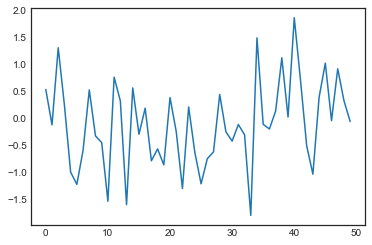

In [8]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

x = range(50)
y = tf.random.normal([50], 0, 1)
plt.plot(x, y)
plt.show()

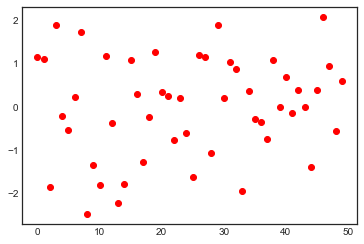

In [9]:
x = range(50)
y = tf.random.normal([50], 0, 1)
plt.plot(x, y, 'ro')
plt.show()

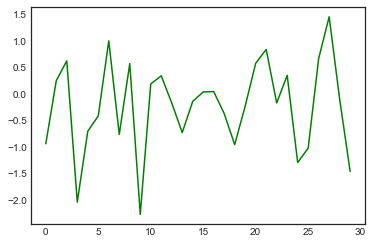

In [10]:
x = range(30)
y = tf.random.normal([30], 0, 1)
plt.plot(x, y, 'g-')
plt.show()

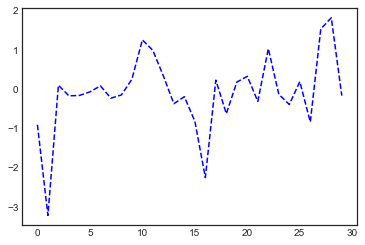

In [11]:
x = range(30)
y = tf.random.normal([30], 0, 1)
plt.plot(x, y, 'b--')
plt.show()

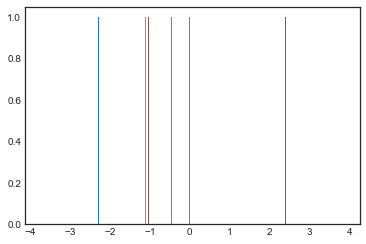

In [16]:
random_normal = tf.random.normal([10000], 0, 1)
plt.hist(random_normal, bins=100)
plt.show()

## XOR Gate의 'LOSS' 시각화

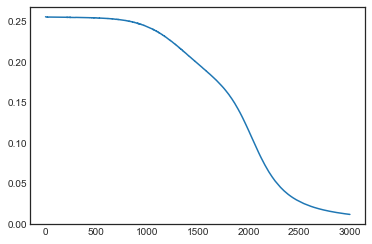

In [15]:
plt.plot(history.history['loss'])